# 우리의 목표:
> ** 배에 타는 승객의 정보를 입력하면 배사고가 났을 때 생존여부를 예측해주는 모델을 만들어보자


## 작업환경설정

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import Image
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 17,8
rcParams['font.family'] = 'AppleGothic' #malgun Gothic


#워닝사인은 무시해도 되나 없앰
import warnings
warnings.filterwarnings('ignore')

from google.colab import files     #colab 돌릴때 파일업로드
uploaded = files.upload()          #colab 돌릴때 파일업로드

Saving gender_submission.csv to gender_submission.csv
Saving titanic_test.csv to titanic_test.csv
Saving titanic_train.csv to titanic_train.csv


In [2]:
test =  pd.read_csv('titanic_test.csv', index_col=0)
print(test.shape)
test.head()
test.info()

(418, 10)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 35.9+ KB


In [3]:
train = pd.read_csv('titanic_train.csv')
print(train.shape)
train.head()
train.info()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
#오토인덱스를 해버리는데.... 
#read_csv시프트 탭키로 인덱스 컬럼을 지정해주는 파라메타가 있음   , index_col

In [5]:
train = pd.read_csv('titanic_train.csv', index_col="PassengerId")
print(train.shape)
train.head()

(891, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# 머신러닝은 null값이나 object는   채워주거나  데이터 타입을 바꿔줘야함 인티저/플롯

In [7]:
train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
test.describe()

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [10]:
test.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"Kelly, Mr. James",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


### 탐색적분석(EDA) + 데이터 전처리  를 잘 해줘야만   머신러닝이 잘 돌아감
### - Feature Selection(데이터를 선택적으로 학습시키기 위해)
예를 들면... 캐빈 넘버의 경우 필요한 정보가 아닌데 중요정보로 인식하여 쓰레기를 학습 할 수 있음
### - Feature Engineering (특성공학)   ★★★
한단계 더 나아가 특정 컬럼을 연결하여 유의미한 정보를 만들어서 그 정보까지 학습시키면 훨씬 효과가 좋아짐

In [11]:
#카테고리 분석   seaborn에 ....
# 생존을 확인하기 위해 0번중요,
#일단 객실별 생존여부 관계 분석

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


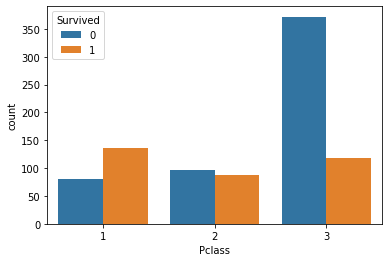

In [12]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [13]:
# 그래프와 같이 매우 연관성있음

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [15]:
train.Embarked.notnull().value_counts()

True     889
False      2
Name: Embarked, dtype: int64

In [16]:
train[train.Embarked.isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN



# 타이타닉 인물에 관한 사항 조사[링크 텍스트]
Mrs Stone boarded the Titanic in **Southampton** on 10 April 1912 and was travelling in first class with her maid Amelie Icard. She occupied cabin B-28.

(https://www.encyclopedia-titanica.org/titanic-survivor/martha-evelyn-stone.html)

In [17]:
train.Embarked.fillna("S", inplace=True)          #시간상 추가 컬럼 아닌 직접 처리하기로함

In [18]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


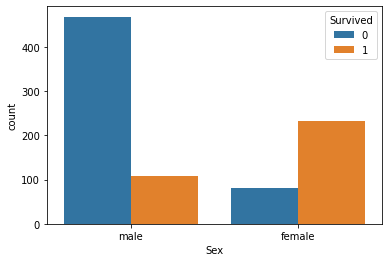

In [19]:
sns.countplot(data=train, x="Sex", hue="Survived")

In [20]:
# 우선 성별도 의미가 있다고 보여짐

In [21]:
# 나이의 경우 연속적  숫자로 구성되어    카운트플롯이 아닌 다른 그래프로 그려야함. 

In [22]:
# SibSp 함께 탑승한 형제 또는 배우자 수    , Parch : 부모 자식 명 수의 총 합

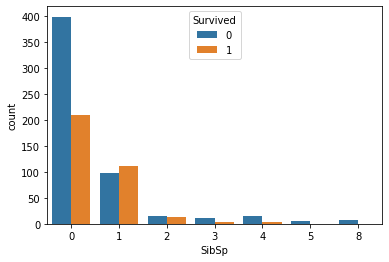

In [23]:
sns.countplot(data=train, x="SibSp", hue="Survived")

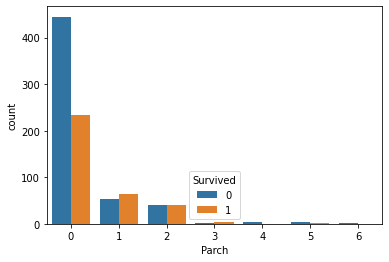

In [24]:
sns.countplot(data=train, x="Parch", hue="Survived")

In [25]:
# 동행수가 많다고해서 생존률이 높은 것은 아니다
# family 컬럼과, 동승여부 컬럼을 만들어봄

In [26]:
# 없는 컬럼을 만듦

test["Fsize"] = test.SibSp + test.Parch

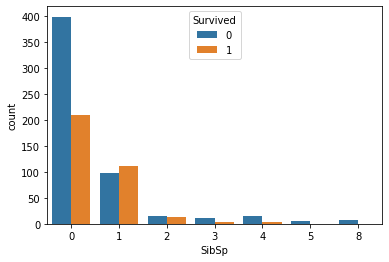

In [27]:
sns.countplot(data=train, x="SibSp", hue="Survived")

In [28]:
test["SibSp_level"] = test.SibSp

test.loc[test.SibSp_level ==0, 'SibSp_level'] = 1
test.loc[test.SibSp_level ==1, 'SibSp_level'] = 2
test.loc[test.SibSp_level ==2, 'SibSp_level'] = 2
test.loc[test.SibSp_level ==3, 'SibSp_level'] = 3
test.loc[test.SibSp_level ==4, 'SibSp_level'] = 3
test.loc[test.SibSp_level ==5, 'SibSp_level'] = 4
test.loc[test.SibSp_level ==8, 'SibSp_level'] = 4

In [29]:
train["SibSp_level"] = train.SibSp

train.loc[train.SibSp_level ==0, 'SibSp_level'] = 1
train.loc[train.SibSp_level ==1, 'SibSp_level'] = 2
train.loc[train.SibSp_level ==2, 'SibSp_level'] = 2
train.loc[train.SibSp_level ==3, 'SibSp_level'] = 3
train.loc[train.SibSp_level ==4, 'SibSp_level'] = 3
train.loc[train.SibSp_level ==5, 'SibSp_level'] = 4
train.loc[train.SibSp_level ==8, 'SibSp_level'] = 4

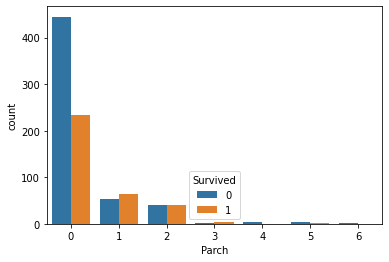

In [30]:
sns.countplot(data=train, x="Parch", hue="Survived")

In [31]:
test["Parch_level"] = test.Parch


test.loc[test.Parch_level ==0, 'Parch_level'] = 1
test.loc[test.Parch_level ==1, 'Parch_level'] = 2
test.loc[test.Parch_level ==2, 'Parch_level'] = 2
test.loc[test.Parch_level ==3, 'Parch_level'] = 2
test.loc[test.Parch_level ==4, 'Parch_level'] = 4
test.loc[test.Parch_level ==5, 'Parch_level'] = 3
test.loc[test.Parch_level ==6, 'Parch_level'] = 4

In [32]:
train["Parch_level"] = train.Parch


train.loc[train.Parch_level ==0, 'Parch_level'] = 1
train.loc[train.Parch_level ==1, 'Parch_level'] = 2
train.loc[train.Parch_level ==2, 'Parch_level'] = 2
train.loc[train.Parch_level ==3, 'Parch_level'] = 2
train.loc[train.Parch_level ==4, 'Parch_level'] = 4
train.loc[train.Parch_level ==5, 'Parch_level'] = 3
train.loc[train.Parch_level ==6, 'Parch_level'] = 4

In [33]:
# 없는 컬럼을 만듦

train["Fsize"] = train.SibSp + train.Parch

In [34]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize
PassengerId,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,1
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,0


In [35]:
test.loc[test.Fsize ==0, 'Alone'] = 1
test.loc[test.Fsize !=0, 'Alone'] = 0

In [36]:
train.loc[train.Fsize ==0, 'Alone'] = 1
train.loc[train.Fsize !=0, 'Alone'] = 0

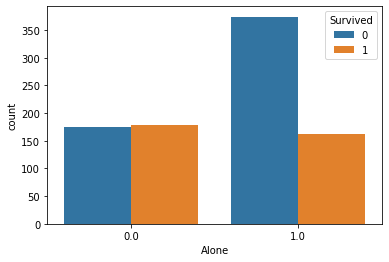

In [37]:
sns.countplot(data=train, x="Alone", hue="Survived")

In [38]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1,0.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,0,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,1,0.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,0,1.0


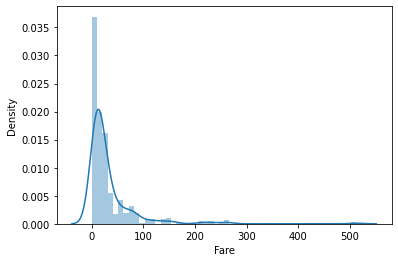

In [39]:
sns.distplot(train.Fare)

# 500불에 대한 분석
> ** Q. Fare를 500불 이상 낸 승객들을 찾아주세요 **

In [40]:
train.loc[train.Fare >= 500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,2,2,0,1.0
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2,2,1,0.0
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,2,2,0,1.0


In [41]:
# 요금이 동일티켓에 동일금액으로,  잘못된 입력값인지 찾는 것도 필요함

In [42]:
test.loc[test.Fare >=500, 'Fare'] = 512/3

In [43]:
train.loc[train.Fare >= 500, 'Fare'] = 512/3

In [44]:
train.loc[train.Fare >= 300]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,


In [45]:
train.loc[train.Fare >= 250]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone
PassengerId,,,,,,,,,,,,,,,
28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.000,C23 C25 C27,S,3,2,5,0.0
89,1,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.000,C23 C25 C27,S,3,2,5,0.0
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,2,2,4,0.0
342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.000,C23 C25 C27,S,3,2,5,0.0
439,0,1,"Fortune, Mr. Mark",male,64.0,1,4,19950,263.000,C23 C25 C27,S,2,4,5,0.0
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.375,B57 B59 B63 B66,C,2,2,4,0.0


In [46]:
survivor = train[train.Survived ==1]
perish = train[train.Survived ==0]

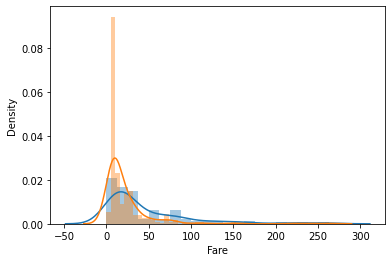

In [47]:
sns.distplot(survivor.Fare)
sns.distplot(perish.Fare)

In [48]:
train[train.Pclass==3].Fare.mean()

13.675550101832997

In [49]:
test.loc[test.Fare.isnull(), 'Fare'] = 13.6755

In [50]:
test.loc[test.Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fsize,SibSp_level,Parch_level,Alone
PassengerId,,,,,,,,,,,,,,


In [51]:
train['new_Fare'] = pd.cut(train['Fare'], 10, labels=['1', '2', '3','4','5','6','7','8','9','10'])

In [52]:
test['new_Fare'] = pd.cut(test['Fare'], 10, labels=['1', '2', '3','4','5','6','7','8','9','10'])

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


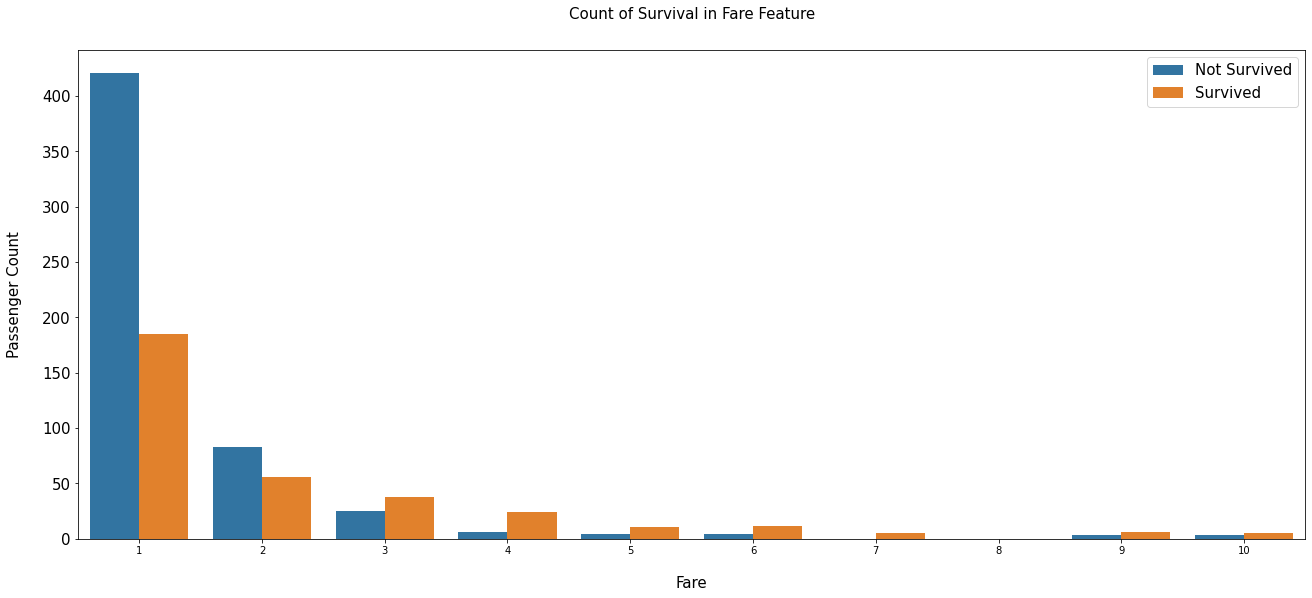

In [53]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='new_Fare', hue='Survived', data=train)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

In [54]:
test.loc[test.new_Fare.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Fsize,SibSp_level,Parch_level,Alone,new_Fare
PassengerId,,,,,,,,,,,,,,,


## lmplot
 - 신규 데이터의 조합이 매우 중요.
 - 나이는 크게 중요하지 않지만 조합에 따라 중요해질 수 있음.


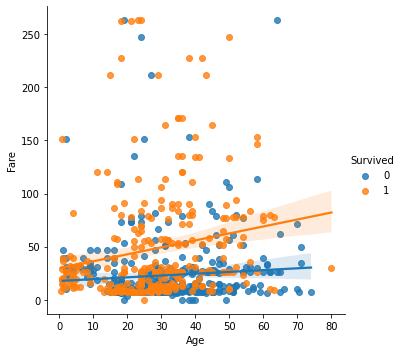

In [55]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived")

In [56]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone,new_Fare
PassengerId,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,2,1,0.0,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,2,1,0.0,3
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2,2,0,1.0,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,2,1,0.0,3
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2,2,0,1.0,1


In [57]:
# 캐빈넘버의 경우, 있는 사람과 없는 사람을 나누어 줌

In [58]:
train.sort_values(by='Ticket', ascending=True)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SibSp_level,Parch_level,Fsize,Alone,new_Fare
PassengerId,,,,,,,,,,,,,,,,
505,1,1,"Maioni, Miss. Roberta",female,16.0,0,0,110152,86.500,B79,S,2,2,0,1.0,4
258,1,1,"Cherry, Miss. Gladys",female,30.0,0,0,110152,86.500,B77,S,2,2,0,1.0,4
760,1,1,"Rothes, the Countess. of (Lucy Noel Martha Dye...",female,33.0,0,0,110152,86.500,B77,S,2,2,0,1.0,4
263,0,1,"Taussig, Mr. Emil",male,52.0,1,1,110413,79.650,E67,S,2,2,2,0.0,4
559,1,1,"Taussig, Mrs. Emil (Tillie Mandelbaum)",female,39.0,1,1,110413,79.650,E67,S,2,2,2,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,0,3,"Harknett, Miss. Alice Phoebe",female,NaN,0,0,W./C. 6609,7.550,NaN,S,2,2,0,1.0,1
93,0,1,"Chaffee, Mr. Herbert Fuller",male,46.0,1,0,W.E.P. 5734,61.175,E31,S,2,2,1,0.0,3
220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.500,NaN,S,2,2,0,1.0,1


In [59]:
train.Cabin.isnull().sum() / train.shape[0]

0.7710437710437711

In [60]:
test.loc[test.Cabin.isnull(), 'Cabin_encode'] = 0
test.loc[test.Cabin.notnull(), 'Cabin_encode'] = 1


In [61]:
train.loc[train.Cabin.isnull(), 'Cabin_encode']=0
train.loc[train.Cabin.notnull(), 'Cabin_encode']=1

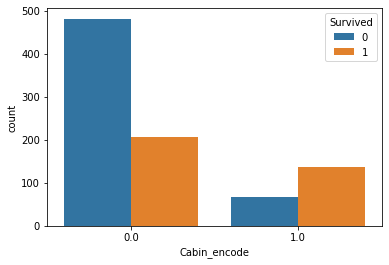

In [62]:
sns.countplot(data=train, x='Cabin_encode', hue="Survived")

In [63]:
train[train.Cabin.notnull()].Pclass.value_counts()     # 이미 1등석이 캐빈넘거가 많이 기록되어있어 추가한다고 영향을 많이 주지 않음

1    176
2     16
3     12
Name: Pclass, dtype: int64

In [64]:
train.Name.sample(30)

PassengerId
616                                  Herman, Miss. Alice
320    Spedden, Mrs. Frederic Oakley (Margaretta Corn...
362                            del Carlo, Mr. Sebastiano
840                                 Marechal, Mr. Pierre
759                         Theobald, Mr. Thomas Leonard
775                Hocking, Mrs. Elizabeth (Eliza Needs)
550                       Davies, Master. John Morgan Jr
28                        Fortune, Mr. Charles Alexander
89                            Fortune, Miss. Mabel Helen
685                    Brown, Mr. Thomas William Solomon
622                         Kimball, Mr. Edwin Nelson Jr
204                                 Youseff, Mr. Gerious
114                              Jussila, Miss. Katriina
480                             Hirvonen, Miss. Hildur E
746                         Crosby, Capt. Edward Gifford
526                                   Farrell, Mr. James
739                                   Ivanoff, Mr. Kanio
191                

- Master  유럽귀족의 젊은 남자...
# 호칭을 잘라내는 함수

In [65]:
def find_title(name):
    
    return name.split(', ')[1].split('.')[0]


In [66]:
test['Title'] = test.Name.apply(find_title)

In [67]:
train['Title']= train.Name.apply(find_title)

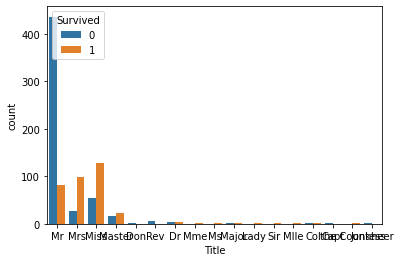

In [68]:

sns.countplot(data=train, x='Title', hue="Survived")

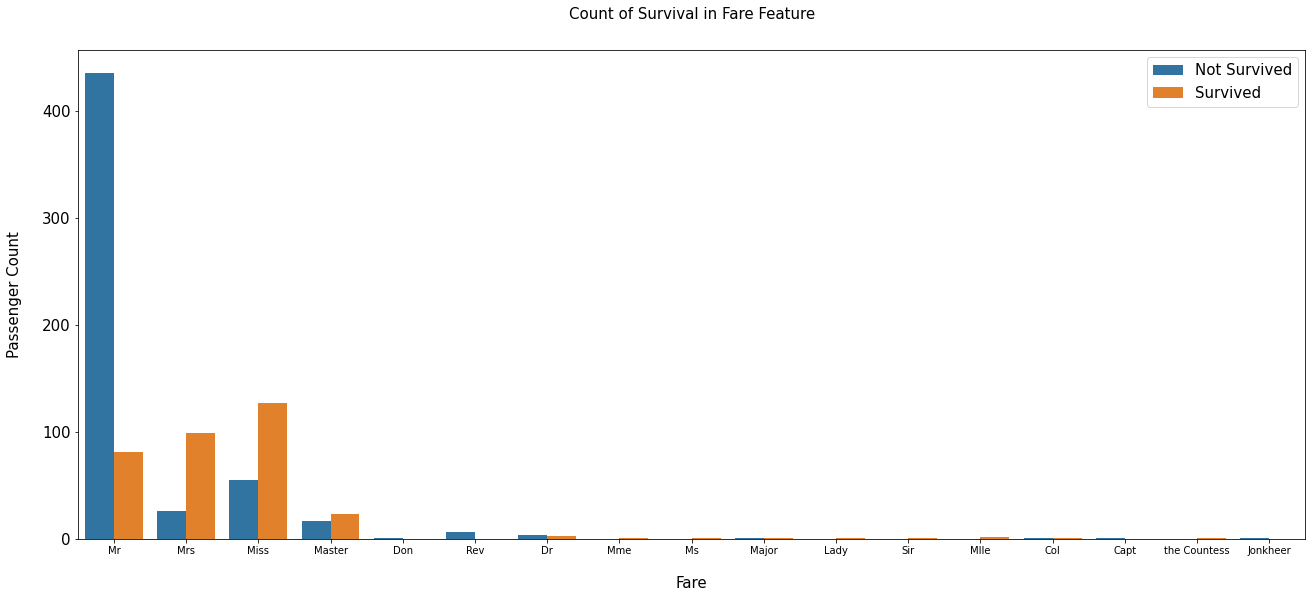

In [69]:
fig, axs = plt.subplots(figsize=(22, 9))
sns.countplot(x='Title', hue='Survived', data=train)

plt.xlabel('Fare', size=15, labelpad=20)
plt.ylabel('Passenger Count', size=15, labelpad=20)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=15)

plt.legend(['Not Survived', 'Survived'], loc='upper right', prop={'size': 15})
plt.title('Count of Survival in {} Feature'.format('Fare'), size=15, y=1.05)

plt.show()

> **Q. Master라는 컬럼을 만들어 주세요, 해당승객이 마스터면, 1로기록, 아니면 0으로 채워주세요

In [70]:
test.loc[test.Title =="Master", "Master"] = 1
test.loc[test.Title !="Master", "Master"] = 0

In [71]:
train.loc[train.Title =="Master", "Master"] = 1
train.loc[train.Title !="Master", "Master"] = 0

Title 경우도 나이 및 생존에 차이가 분명히 날 것이므로 추가적으로 분리해보기로 함

In [72]:
train[train.Title.notnull()].Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

In [73]:

test.loc[test.Title =="Mrs", "Mrs"] = "1"
test.loc[test.Title !="Mrs", "Mrs"] = "0"
train.loc[train.Title =="Mrs", "Mrs"] = "1"
train.loc[train.Title !="Mrs", "Mrs"] = "0"


test.loc[test.Title =="Miss", "Miss"] = "1"
test.loc[test.Title !="Miss", "Miss"] = "0"
train.loc[train.Title =="Miss", "Miss"] = "1"
train.loc[train.Title !="Miss", "Miss"] = "0"

test.loc[test.Title =="Mme", "Mme"] = "1"
test.loc[test.Title !="Mme", "Mme"] = "0"
train.loc[train.Title =="Mme", "Mme"] = "1"
train.loc[train.Title !="Mme", "Mme"] = "0"

test.loc[test.Title =="Ms", "Ms"] = "1"
test.loc[test.Title !="Ms", "Ms"] = "0"
train.loc[train.Title =="Ms", "Ms"] = "1"
train.loc[train.Title !="Ms", "Ms"] = "0"

test.loc[test.Title =="Lady", "Lady"] = "1"
test.loc[test.Title !="Lady", "Lady"] = "0"
train.loc[train.Title =="Lady", "Lady"] = "1"
train.loc[train.Title !="Lady", "Lady"] = "0"

test.loc[test.Title =="Sir", "Sir"] = "1"
test.loc[test.Title !="Sir", "Sir"] = "0"
train.loc[train.Title =="Sir", "Sir"] = "1"
train.loc[train.Title !="Sir", "Sir"] = "0"

test.loc[test.Title =="Mlle", "Mlle"] = "1"
test.loc[test.Title !="Mlle", "Mlle"] = "0"
train.loc[train.Title =="Mlle", "Mlle"] = "1"
train.loc[train.Title !="Mlle", "Mlle"] = "0"

test.loc[test.Title =="the Countess", "the Countess"] = "1"
test.loc[test.Title !="the Countess", "the Countess"] = "0"
train.loc[train.Title =="the Countess", "the Countess"] = "1"
train.loc[train.Title !="the Countess", "the Countess"] = "0"

test.loc[test.Title =="Man", "Man"] = "1"
test.loc[test.Title !="Man", "Man"] = "0"
train.loc[train.Title =="Man", "Man"] = "1"
train.loc[train.Title !="Man", "Man"] = "0"

# Embarked

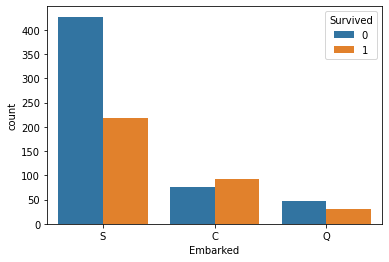

In [74]:
sns.countplot(data=train, x="Embarked", hue="Survived")

> ** Q. Embarkded 컬럼을 원핫인코딩해주세요 ,   E_S, E_C, E_Q라는 컬럼을 만들어주세요

In [75]:
embarked = pd.get_dummies(test.Embarked, prefix="Embarked")
test = pd.concat([test, embarked], axis=1)

In [76]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Mme,Ms,Lady,Sir,Mlle,the Countess,Man,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,...,0,0,0,0,0,0,0,0,1,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,...,0,0,0,0,0,0,0,0,0,1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,...,0,0,0,0,0,0,0,0,1,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,...,0,0,0,0,0,0,0,0,0,1
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,...,0,0,0,0,0,0,0,0,0,1


In [77]:
embarked = pd.get_dummies(train.Embarked, prefix="Embarked")
train = pd.concat([train, embarked], axis=1)
train.head()
embarked

,Embarked_C,Embarked_Q,Embarked_S
PassengerId,,,
1,0,0,1
2,1,0,0
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
887,0,0,1
888,0,0,1
889,0,0,1


In [78]:
test.loc[test.Sex=='male', 'Sex_encode'] = 0
test.loc[test.Sex=='female', 'Sex_encode'] = 1


In [79]:
train.loc[train.Sex=='male', 'Sex_encode']=0
train.loc[train.Sex=='female', 'Sex_encode']=1

In [80]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ms,Lady,Sir,Mlle,the Countess,Man,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,...,0,0,0,0,0,0,0,0,1,0.0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,...,0,0,0,0,0,0,1,0,0,1.0
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,...,0,0,0,0,0,0,0,0,1,1.0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,...,0,0,0,0,0,0,0,0,1,1.0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,...,0,0,0,0,0,0,0,0,1,0.0


In [81]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Pclass        418 non-null    int64   
 1   Name          418 non-null    object  
 2   Sex           418 non-null    object  
 3   Age           332 non-null    float64 
 4   SibSp         418 non-null    int64   
 5   Parch         418 non-null    int64   
 6   Ticket        418 non-null    object  
 7   Fare          418 non-null    float64 
 8   Cabin         91 non-null     object  
 9   Embarked      418 non-null    object  
 10  Fsize         418 non-null    int64   
 11  SibSp_level   418 non-null    int64   
 12  Parch_level   418 non-null    int64   
 13  Alone         418 non-null    float64 
 14  new_Fare      418 non-null    category
 15  Cabin_encode  418 non-null    float64 
 16  Title         418 non-null    object  
 17  Master        418 non-null    float64 
 18  Mrs    

In [82]:
train.Age.isnull().sum() / train.shape[0]

0.19865319865319866

In [83]:
train.Age.mean()

29.69911764705882

In [84]:
train[train.Pclass==1].Age.mean()

38.233440860215055

In [85]:
train[train.Pclass==2].Age.mean()

29.87763005780347

In [86]:
train[train.Pclass==3].Age.mean()

25.14061971830986

> ** Q. Pclass와 성별을 둘다 고려해서 평균나이를 찾아주세요, 예를 1등석 남자의 평균, 2등석 여자의 평균은 다를까?

In [87]:
train[(train.Sex=='female')&(train.Pclass==1)].Age.mean()

34.61176470588235

In [88]:
train[(train.Sex=='female')&(train.Pclass==2)].Age.mean()

28.722972972972972

In [89]:
train[(train.Sex=='female')&(train.Pclass==3)].Age.mean()

21.75

In [90]:
train[(train.Sex=='male')&(train.Pclass==1)].Age.mean()

41.28138613861386

In [91]:
train[(train.Sex=='male')&(train.Pclass==2)].Age.mean()

30.74070707070707

In [92]:
train[(train.Sex=='male')&(train.Pclass==3)].Age.mean()

26.507588932806325

> ** 호칭에 따른 나이를 추가 구분해 봄

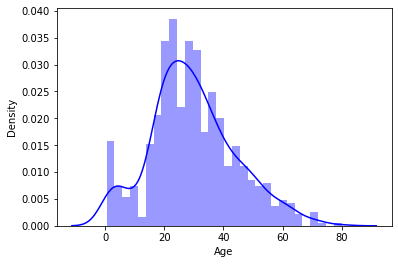

In [93]:
sns.distplot(train["Age"], color="blue", label="Age", bins=30)

In [94]:
train[train.Age.isnull()].describe()


,Survived,Pclass,Age,SibSp,Parch,Fare,SibSp_level,Parch_level,Fsize,Alone,Cabin_encode,Master,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
count,177.000000,177.000000,0.0,177.000000,177.000000,177.000000,177.000000,177.0,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,0.293785,2.598870,NaN,0.564972,0.180791,22.158567,2.101695,2.0,0.745763,0.751412,0.107345,0.022599,0.214689,0.276836,0.508475,0.299435
std,0.456787,0.763216,NaN,1.626316,0.534145,31.874608,0.414026,0.0,2.052658,0.433420,0.310429,0.149042,0.411771,0.448704,0.501346,0.459310
min,0.000000,1.000000,NaN,0.000000,0.000000,0.000000,2.000000,2.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,NaN,0.000000,0.000000,7.750000,2.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,NaN,0.000000,0.000000,8.050000,2.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,3.000000,NaN,0.000000,0.000000,24.150000,2.000000,2.0,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,3.000000,NaN,8.000000,2.000000,227.525000,4.000000,2.0,10.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
train[train.Age.isnull()].describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked,Title,Mrs,Miss,Mme,Ms,Lady,Sir,Mlle,the Countess,Man
count,177,177,177,19,177,177,177,177,177,177,177,177,177,177,177
unique,177,2,155,19,3,5,2,2,1,1,1,1,1,1,1
top,"Moran, Mr. James",male,CA. 2343,B78,S,Mr,0,0,0,0,0,0,0,0,0
freq,1,124,7,1,90,119,160,141,177,177,177,177,177,177,177


Text(0.5, 1.0, 'Test Set')

findfont: Font family ['AppleGothic'] not found. Falling back to DejaVu Sans.


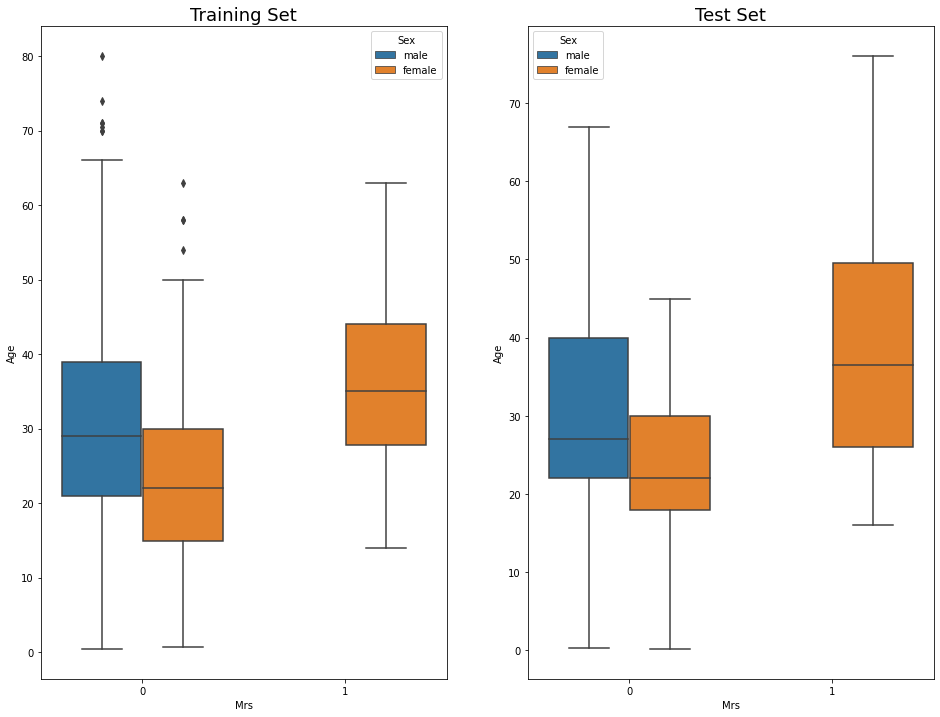

In [96]:
fig, ax = plt.subplots(figsize=(16,12),ncols=2)
ax1 = sns.boxplot(x="Mrs", y="Age", hue="Sex", data=train, ax = ax[0]);
ax2 = sns.boxplot(x="Mrs", y="Age", hue="Sex", data=test, ax = ax[1]);
ax1.set_title("Training Set", fontsize = 18)
ax2.set_title('Test Set',  fontsize = 18)

In [97]:
train[(train.Mrs == "1")].Age.mean()

35.898148148148145

In [98]:
test[(test.Mrs == "1")].Age.mean()

38.903225806451616

In [99]:
train[(train.Miss == "1")].Age.mean()

21.773972602739725

In [100]:
test[(test.Miss == "1")].Age.mean()

21.774843750000002

* 마스터나이 먼저 처리
 - 어린 남성으로 분류 되므로

In [101]:
train.groupby('Master')['Age'].mean()
# sns.countplot(data=train, x='Age', hue="Master")

Master
0.0    31.033186
1.0     4.574167
Name: Age, dtype: float64

In [102]:
train.loc[(train.Age.isnull())&(train.Master=='1'),'Age']=4.57

* 그 다음 Mrs, Miss의 평균나이를  채워보기로 한다.


In [103]:
train_MissAge = train[(train.Miss == "1")].Age.mean()
test_MissAge = test[(test.Miss == "1")].Age.mean()

#train_MrsAge = train[(train.Mrs == "1")].Age.mean()
#test_MrsAge = test[(test.Mrs == "1")].Age.mean()


In [104]:
train.loc[(train.Age.isnull())
          &(train.Miss=='1'),'Age'] = train_MissAge

test.loc[(test.Age.isnull())
          &(train.Miss=='1'),'Age'] = test_MissAge

In [105]:
test[test.Age.isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Ms,Lady,Sir,Mlle,the Countess,Man,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,
902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,NaN,S,...,0,0,0,0,0,0,0,0,1,0.0
914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,NaN,S,...,0,0,0,0,0,0,0,0,1,1.0
921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,NaN,C,...,0,0,0,0,0,0,1,0,0,0.0
925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,...,0,0,0,0,0,0,0,0,1,1.0
928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,NaN,S,...,0,0,0,0,0,0,0,0,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q,...,0,0,0,0,0,0,0,1,0,1.0
1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q,...,0,0,0,0,0,0,0,1,0,1.0
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,...,0,0,0,0,0,0,0,0,1,0.0


In [106]:
train[train.Age.isnull()].describe(include=["O"])

,Name,Sex,Ticket,Cabin,Embarked,Title,Mrs,Miss,Mme,Ms,Lady,Sir,Mlle,the Countess,Man
count,141,141,141,17,141,141,141,141,141,141,141,141,141,141,141
unique,141,2,130,17,3,4,2,1,1,1,1,1,1,1,1
top,"Moran, Mr. James",male,CA. 2343,B78,S,Mr,0,0,0,0,0,0,0,0,0
freq,1,124,4,1,80,119,124,141,141,141,141,141,141,141,141


In [107]:
m1=train[(train.Sex=='male')&(train.Pclass==1)].Age.mean()
f1=train[(train.Sex=='female')&(train.Pclass==1)].Age.mean()
m2=train[(train.Sex=='male')&(train.Pclass==2)].Age.mean()
f2=train[(train.Sex=='female')&(train.Pclass==2)].Age.mean()
m3=train[(train.Sex=='male')&(train.Pclass==3)].Age.mean()
f3=train[(train.Sex=='female')&(train.Pclass==3)].Age.mean()

In [108]:
test.loc[(test.Age.isnull())
          &(test.Sex=='male')
          &(test.Pclass==1), 'Age'] = m1
test.loc[(test.Age.isnull())
          &(test.Sex=='female')
          &(test.Pclass==1), 'Age'] = f1
test.loc[(test.Age.isnull())
          &(test.Sex=='male')
          &(test.Pclass==2), 'Age'] = m2
test.loc[(test.Age.isnull())
          &(test.Sex=='female')
          &(test.Pclass==2), 'Age'] = f2
test.loc[(test.Age.isnull())
          &(test.Sex=='male')
          &(test.Pclass==3), 'Age'] = m3
test.loc[(test.Age.isnull())
          &(test.Sex=='female')
          &(test.Pclass==3), 'Age'] = f3

In [109]:
train.loc[(train.Age.isnull())
          &(train.Sex=='male')
          &(train.Pclass==1),'Age'] = m1
train.loc[(train.Age.isnull())
          &(train.Sex=='female')
          &(train.Pclass==1),'Age'] = f1
train.loc[(train.Age.isnull())
          &(train.Sex=='male')
          &(train.Pclass==2),'Age'] = m2
train.loc[(train.Age.isnull())
          &(train.Sex=='female')
          &(train.Pclass==2),'Age'] = f2
train.loc[(train.Age.isnull())
          &(train.Sex=='male')
          &(train.Pclass==3),'Age'] = m3
train.loc[(train.Age.isnull())
          &(train.Sex=='female')
          &(train.Pclass==3),'Age'] = f3

In [110]:
train.Age.isnull().sum()

0

In [111]:
train.sort_values(by='Age', ascending=True).head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,Ms,Lady,Sir,Mlle,the Countess,Man,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
PassengerId,,,,,,,,,,,,,,,,,,,,,
804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,...,0,0,0,0,0,0,1,0,0,0.0
756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,...,0,0,0,0,0,0,0,0,1,0.0
645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,...,0,0,0,0,0,0,1,0,0,1.0
470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,...,0,0,0,0,0,0,1,0,0,1.0
79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,...,0,0,0,0,0,0,0,0,1,0.0
832,1,2,"Richards, Master. George Sibley",male,0.83,1,1,29106,18.7500,NaN,...,0,0,0,0,0,0,0,0,1,0.0
306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,...,0,0,0,0,0,0,0,0,1,0.0
387,0,3,"Goodwin, Master. Sidney Leonard",male,1.00,5,2,CA 2144,46.9000,NaN,...,0,0,0,0,0,0,0,0,1,0.0
173,1,3,"Johnson, Miss. Eleanor Ileen",female,1.00,1,1,347742,11.1333,NaN,...,0,0,0,0,0,0,0,0,1,1.0


In [112]:
train['new_Age'] = pd.cut(train['Age'], 10, labels=['1', '2', '3','4','5','6','7','8','9','10'])

In [113]:
test['new_Age'] = pd.cut(test['Age'], 10, labels=['1', '2', '3','4','5','6','7','8','9','10'])

### 상관관계 분석

In [114]:
train.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,SibSp_level,Parch_level,Fsize,Alone,Cabin_encode,Master,Embarked_C,Embarked_Q,Embarked_S,Sex_encode
Survived,1.000000,-0.338481,-0.070422,-0.035322,0.081629,0.270353,-0.118877,-0.065881,0.016639,-0.203367,0.316912,0.085221,0.168240,0.003650,-0.149683,0.543351
Pclass,-0.338481,1.000000,-0.404514,0.083081,0.018443,-0.608669,0.150038,0.051341,0.065997,0.135207,-0.725541,0.082081,-0.243292,0.221009,0.074053,-0.131900
Age,-0.070422,-0.404514,1.000000,-0.250126,-0.179532,0.125825,-0.247657,0.100761,-0.260643,0.181818,0.271591,-0.367703,0.039706,-0.085264,0.018872,-0.115913
SibSp,-0.035322,0.083081,-0.250126,1.000000,0.414838,0.202377,0.864934,0.019277,0.890712,-0.584471,-0.040460,0.349559,-0.059528,-0.026354,0.068734,0.114631
Parch,0.081629,0.018443,-0.179532,0.414838,1.000000,0.258082,0.347313,0.528948,0.783111,-0.583398,0.036987,0.267344,-0.011069,-0.081228,0.060814,0.245489
Fare,0.270353,-0.608669,0.125825,0.202377,0.258082,1.000000,0.119170,0.075660,0.267251,-0.325976,0.543109,0.018893,0.262436,-0.130566,-0.147740,0.217338
SibSp_level,-0.118877,0.150038,-0.247657,0.864934,0.347313,0.119170,1.000000,-0.022192,0.764665,-0.270585,-0.092671,0.354804,-0.105902,-0.013647,0.101362,0.036156
Parch_level,-0.065881,0.051341,0.100761,0.019277,0.528948,0.075660,-0.022192,1.000000,0.277429,-0.124415,-0.022990,-0.021900,-0.048694,-0.007101,0.047127,0.066450
Fsize,0.016639,0.065997,-0.260643,0.890712,0.783111,0.267251,0.764665,0.277429,1.000000,-0.690922,-0.009175,0.372472,-0.046215,-0.058592,0.077359,0.200988
Alone,-0.203367,0.135207,0.181818,-0.584471,-0.583398,-0.325976,-0.270585,-0.124415,-0.690922,1.000000,-0.158029,-0.267024,-0.095298,0.086464,0.029074,-0.303646


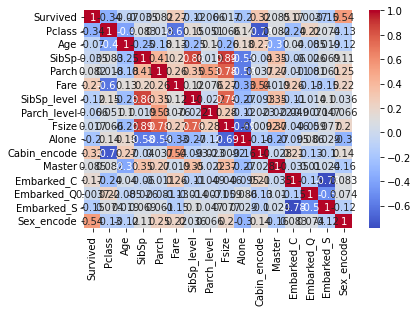

In [115]:
sns.heatmap(train.corr(), annot=True, cmap = 'coolwarm')

In [116]:
train.corrwith(train.Survived).sort_values()

Pclass         -0.338481
Alone          -0.203367
Embarked_S     -0.149683
SibSp_level    -0.118877
Age            -0.070422
Parch_level    -0.065881
SibSp          -0.035322
Embarked_Q      0.003650
Fsize           0.016639
Parch           0.081629
Master          0.085221
Embarked_C      0.168240
Fare            0.270353
Cabin_encode    0.316912
Sex_encode      0.543351
Survived        1.000000
dtype: float64

In [117]:
# 수업 기본형

# features = ["Sex_encode", 'Pclass', 'Alone', 
#            "Embarked_C", 'Embarked_Q', "Embarked_S",
#            "Age", "Master", 'Fare']

In [146]:
features = ["Sex_encode", "Pclass", "Alone", "Cabin_encode", "Embarked_C", "Embarked_Q", "Embarked_S",
            "Master", "Miss","Mrs","Parch_level", "SibSp_level", "new_Fare","new_Age"]
           

In [147]:
X_test = test[features]

In [148]:
X_train = train[features]

In [149]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 892 to 1309
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Sex_encode    418 non-null    float64 
 1   Pclass        418 non-null    int64   
 2   Alone         418 non-null    float64 
 3   Cabin_encode  418 non-null    float64 
 4   Embarked_C    418 non-null    uint8   
 5   Embarked_Q    418 non-null    uint8   
 6   Embarked_S    418 non-null    uint8   
 7   Master        418 non-null    float64 
 8   Miss          418 non-null    object  
 9   Mrs           418 non-null    object  
 10  Parch_level   418 non-null    int64   
 11  SibSp_level   418 non-null    int64   
 12  new_Fare      418 non-null    category
 13  new_Age       418 non-null    category
dtypes: category(2), float64(4), int64(3), object(2), uint8(3)
memory usage: 51.6+ KB


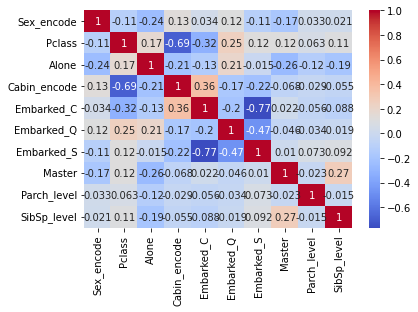

In [150]:
sns.heatmap(X_test.corr(), annot=True, cmap = 'coolwarm')

In [153]:
test.sort_values(by='Fare', ascending=False) 

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,...,Lady,Sir,Mlle,the Countess,Man,Embarked_C,Embarked_Q,Embarked_S,Sex_encode,new_Age
PassengerId,,,,,,,,,,,,,,,,,,,,,
961,1,"Fortune, Mrs. Mark (Mary McDougald)",female,60.000000,1,4,19950,263.0000,C23 C25 C27,S,...,0,0,0,0,0,0,0,1,1.0,8
945,1,"Fortune, Miss. Ethel Flora",female,28.000000,3,2,19950,263.0000,C23 C25 C27,S,...,0,0,0,0,0,0,0,1,1.0,4
916,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.000000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,...,0,0,0,0,0,1,0,0,1.0,7
1034,1,"Ryerson, Mr. Arthur Larned",male,61.000000,1,3,PC 17608,262.3750,B57 B59 B63 B66,C,...,0,0,0,0,0,1,0,0,0.0,9
951,1,"Chaudanson, Miss. Victorine",female,36.000000,0,0,PC 17608,262.3750,B61,C,...,0,0,0,0,0,1,0,0,1.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1008,3,"Thomas, Mr. John",male,26.507589,0,0,2681,6.4375,NaN,C,...,0,0,0,0,0,1,0,0,0.0,4
1025,3,"Thomas, Mr. Charles P",male,26.507589,1,0,2621,6.4375,NaN,C,...,0,0,0,0,0,1,0,0,0.0,4
913,3,"Olsen, Master. Artur Karl",male,9.000000,0,1,C 17368,3.1708,NaN,S,...,0,0,0,0,0,0,0,1,0.0,2


In [154]:
train.loc[train.Pclass==3].Fare.mean()

13.675550101832997

In [155]:
test.loc[test.Pclass==3].Fare.mean()

12.46525504587156

In [156]:
y_train = train.Survived

In [157]:
y_train.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

머신러닝의 처리 개념



과대적합(overfitting)이란 머신러닝 모델을 학습할 때 학습 데이터셋에 지나치게 최적화하여 발생하는 문제입니다. 즉, 모델을 지나치게 복잡하게 학습하여 학습 데이터셋에서는 모델 성능이 높게 나타나지만 정작 새로운 데이터가 주어졌을 때 정확한 예측/분류를 수행하지 못합니다

그래서 과대적합(복잡성)을 피하기 위해서 
머신러닝할 때 모든 것을 학습시키지 않음. 
* max_depth를 두거나, min_Sample_split을 하거나.... min_sample_leaf 

자동화기술로  앞으로 머신러닝 같은 경우는 
- EDA, 핏쳐셀렉션, 핏쳐엔지니어링이 매우 중요한 역량으로 판단할 수 있음
   

### AI 모델을 만들어보자
- sklearn

In [158]:
from sklearn.tree import DecisionTreeClassifier             #의사결정기법 라이브러리

In [160]:
model = DecisionTreeClassifier(max_depth=9)                 # 기본 머신러닝 값에서.   옵션값으로 튜닝을 하여서 과대적합 등에 대한 가지치기해야함.


# 교차검증(cross Validation)

In [215]:
from sklearn.model_selection import cross_val_score

모델학습


- 그러나....
더 최적화된 학습방법을 이용하여 학습과 모델링함
- Bagging    RandomForest 기법 :   의사결정나무를 한 번만하는 것이 아니라  수만개의 의사결정을 만듦
- 샘플만 bagging 하는 것이 아니라
- Features 도 랜덤하게 배깅랜덤포레스트 함. 
   >> 이렇게 할 경우 과거 결과에 집착하기 보다는 일반화된 의사결정을 받기 위함
   >>

한단계 더 나아가   Boosting   기법을 개발하게 됨
- xgboost
- GradientBoosting
- LightGBM

> - 하이퍼 파라메터 튜닝으로 더 많이 할 수 록 배깅랜덤포레스팅보다 점점 성능이 더 좋아짐(즉, 처음에는 배깅랜덤포레스팅이 좋긴 함)
> - 부스팅 방법은..... 맞는것과 맞지 않는 것들에 대해 추가 재분석을 함.

In [216]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [217]:
# model = RandomForestClassifier(n_estimators = 500,
#                              max_depth = 7,
#                              max_features = 0.7,
#                              random_state =31,
#                              n_jobs=-1)
#                                             #random_state  추가를 하는 것은 이것 조차 랜덤하게함. 왜 코드를 너무 잘 만들 수 있어

In [218]:
# model = GradientBoostingClassifier(n_estimators = 300, 
#                                   max_depth = 10, 
#                                   max_features =0.9,
#                                   random_state=31)

# # 자동화 코드짜는 법
# # 1. 그리드 서치
# # max_depth = [1,3,5,7,9]
# # max_features = [0.5,0.6,0.7,0.8,0.9]
# # 
# # 2. fosejatjcl

In [221]:
cross_val_score(model, X_train, y_train, cv=17)                              # 점수 측정

array([0.67924528, 0.8490566 , 0.83018868, 0.75471698, 0.8490566 ,
       0.81132075, 0.86792453, 0.86538462, 0.86538462, 0.80769231,
       0.80769231, 0.78846154, 0.78846154, 0.88461538, 0.82692308,
       0.78846154, 0.88461538])

In [222]:
cross_val_score(model, X_train, y_train, cv=17).mean()                      #점수 측정 평균

0.8216511568342867

# 하이퍼 파라미터 튜닝자동화 

In [223]:
# 그리드서치 자동화 방법 코드

hyper_result1 =[]

#수업기본형:max_depth = [3,5,7,9,11,13]
#수업기본형:max_feature = [0.7,0.8,0.9,1.0]
max_depth = [3,5,7,9]
max_feature = [0.2,0.3,0.4,1.0]


for a in max_depth:
    for b in max_feature:
        model1 = RandomForestClassifier(n_estimators = 500, 
                                      max_depth = a, 
                                      max_features =b, 
                                      random_state=31,
                                      n_jobs=-1)
        
        #기본형:score = cross_val_score(model1, X_train, y_train, cv=5).mean()
        score = cross_val_score(model1, X_train, y_train, cv=17).mean()
        
        hyper_result1.append({'점수' : score,
                            'MAX_depth': a,
                            'MAX_features': b})
        
        print("현재 스코어는 {0:.5f}".format(score))


현재 스코어는 0.82263
현재 스코어는 0.81021
현재 스코어는 0.81132
현재 스코어는 0.81821
현재 스코어는 0.83170
현재 스코어는 0.82270
현재 스코어는 0.82720
현재 스코어는 0.83170
현재 스코어는 0.83286
현재 스코어는 0.83057
현재 스코어는 0.83399
현재 스코어는 0.83183
현재 스코어는 0.82620
현재 스코어는 0.82061
현재 스코어는 0.82287
현재 스코어는 0.82848


In [224]:
pd.DataFrame(hyper_result1).sort_values(by='점수', ascending=False)           #자동화 점수결과를 pd로 정리

,점수,MAX_depth,MAX_features
10,0.833988,7,0.4
8,0.832857,7,0.2
11,0.831832,7,1.0
4,0.831704,5,0.2
7,0.831704,5,1.0
9,0.830573,7,0.3
15,0.828481,9,1.0
6,0.827201,5,0.4
12,0.826197,9,0.2
14,0.822868,9,0.4


In [229]:
from tqdm import tqdm

# 랜덤서치 자동화 방법 코드

hyper_result2 =[]



for i in tqdm(range(180)):
    #수업기본형:a = np.random.randint(6,15)
    #수업기본형b = np.random.uniform(0.7,1.0)
    a = np.random.randint(2,8)
    b = np.random.uniform(0.2,0.8)
    model2 = GradientBoostingClassifier(n_estimators = 3000, 
                                  max_depth = a, 
                                  max_features =b, 
                                  min_samples_split=3,
                                  min_samples_leaf=1,
                                  random_state=31)
        
    score = cross_val_score(model2, X_train, y_train, cv=17).mean()
        
    hyper_result2.append({'점수' : score,
                          'n_estimators' : 4000,
                          'MAX_depth': a,
                          'MAX_features': b,
                          'cv' : 17})
        
    print("현재 스코어는 {0:.5f}".format(score))


  1%|          | 1/180 [01:12<3:35:06, 72.10s/it]

현재 스코어는 0.81841


  1%|          | 2/180 [03:05<4:45:18, 96.17s/it]

현재 스코어는 0.81055


  2%|▏         | 3/180 [03:43<3:26:15, 69.92s/it]

현재 스코어는 0.81954


  2%|▏         | 4/180 [05:36<4:14:23, 86.72s/it]

현재 스코어는 0.81060


  3%|▎         | 5/180 [06:28<3:36:19, 74.17s/it]

현재 스코어는 0.81730


  3%|▎         | 6/180 [07:20<3:13:09, 66.61s/it]

현재 스코어는 0.81168


  4%|▍         | 7/180 [08:18<3:04:23, 63.95s/it]

현재 스코어는 0.81510


  4%|▍         | 8/180 [09:32<3:12:30, 67.15s/it]

현재 스코어는 0.81506


  5%|▌         | 9/180 [10:00<2:36:24, 54.88s/it]

현재 스코어는 0.83623


  6%|▌         | 10/180 [10:29<2:12:40, 46.83s/it]

현재 스코어는 0.83288


  6%|▌         | 11/180 [11:37<2:29:53, 53.22s/it]

현재 스코어는 0.81728


  7%|▋         | 12/180 [13:05<2:58:40, 63.81s/it]

현재 스코어는 0.82065


  7%|▋         | 13/180 [14:35<3:20:05, 71.89s/it]

현재 스코어는 0.81843


  8%|▊         | 14/180 [15:30<3:04:50, 66.81s/it]

현재 스코어는 0.81619


  8%|▊         | 15/180 [17:30<3:48:06, 82.95s/it]

현재 스코어는 0.81501


  9%|▉         | 16/180 [18:01<3:03:16, 67.05s/it]

현재 스코어는 0.83286


  9%|▉         | 17/180 [19:00<2:56:15, 64.88s/it]

현재 스코어는 0.82067


 10%|█         | 18/180 [20:56<3:36:42, 80.26s/it]

현재 스코어는 0.81732


 11%|█         | 19/180 [22:57<4:07:51, 92.37s/it]

현재 스코어는 0.81501


 11%|█         | 20/180 [24:05<3:46:47, 85.05s/it]

현재 스코어는 0.81728


 12%|█▏        | 21/180 [24:48<3:12:01, 72.46s/it]

현재 스코어는 0.81619


 12%|█▏        | 22/180 [25:28<2:45:07, 62.70s/it]

현재 스코어는 0.81954


 13%|█▎        | 23/180 [26:40<2:51:35, 65.58s/it]

현재 스코어는 0.81841


 13%|█▎        | 24/180 [28:07<3:06:58, 71.91s/it]

현재 스코어는 0.81839


 14%|█▍        | 25/180 [29:59<3:36:32, 83.82s/it]

현재 스코어는 0.81051


 14%|█▍        | 26/180 [30:35<2:58:19, 69.48s/it]

현재 스코어는 0.81952


 15%|█▌        | 27/180 [31:03<2:25:54, 57.22s/it]

현재 스코어는 0.83288


 16%|█▌        | 28/180 [32:54<3:05:24, 73.19s/it]

현재 스코어는 0.80942


 16%|█▌        | 29/180 [33:36<2:40:33, 63.80s/it]

현재 스코어는 0.81954


 17%|█▋        | 30/180 [34:17<2:22:58, 57.19s/it]

현재 스코어는 0.81954


 17%|█▋        | 31/180 [35:46<2:45:15, 66.54s/it]

현재 스코어는 0.81952


 18%|█▊        | 32/180 [36:53<2:44:41, 66.77s/it]

현재 스코어는 0.81728


 18%|█▊        | 33/180 [38:27<3:03:41, 74.98s/it]

현재 스코어는 0.82178


 19%|█▉        | 34/180 [40:21<3:30:58, 86.70s/it]

현재 스코어는 0.81055


 19%|█▉        | 35/180 [41:08<3:00:34, 74.72s/it]

현재 스코어는 0.81506


 20%|██        | 36/180 [41:47<2:33:12, 63.84s/it]

현재 스코어는 0.81954


 21%|██        | 37/180 [43:01<2:39:57, 67.12s/it]

현재 스코어는 0.81392


 21%|██        | 38/180 [43:59<2:32:03, 64.25s/it]

현재 스코어는 0.81847


 22%|██▏       | 39/180 [44:38<2:13:04, 56.63s/it]

현재 스코어는 0.81954


 22%|██▏       | 40/180 [45:29<2:08:30, 55.07s/it]

현재 스코어는 0.81728


 23%|██▎       | 41/180 [47:29<2:52:43, 74.56s/it]

현재 스코어는 0.81501


 23%|██▎       | 42/180 [48:57<3:00:39, 78.54s/it]

현재 스코어는 0.81952


 24%|██▍       | 43/180 [49:37<2:33:00, 67.01s/it]

현재 스코어는 0.82180


 24%|██▍       | 44/180 [50:49<2:35:29, 68.60s/it]

현재 스코어는 0.81841


 25%|██▌       | 45/180 [51:34<2:18:24, 61.51s/it]

현재 스코어는 0.82067


 26%|██▌       | 46/180 [52:12<2:01:22, 54.35s/it]

현재 스코어는 0.81954


 26%|██▌       | 47/180 [53:46<2:26:52, 66.26s/it]

현재 스코어는 0.81614


 27%|██▋       | 48/180 [55:41<2:57:52, 80.85s/it]

현재 스코어는 0.81060


 27%|██▋       | 49/180 [56:19<2:28:18, 67.93s/it]

현재 스코어는 0.81954


 28%|██▊       | 50/180 [58:11<2:56:17, 81.37s/it]

현재 스코어는 0.81051


 28%|██▊       | 51/180 [58:56<2:31:00, 70.24s/it]

현재 스코어는 0.82291


 29%|██▉       | 52/180 [1:00:26<2:42:30, 76.18s/it]

현재 스코어는 0.81952


 29%|██▉       | 53/180 [1:00:56<2:12:05, 62.40s/it]

현재 스코어는 0.83064


 30%|███       | 54/180 [1:01:37<1:57:20, 55.88s/it]

현재 스코어는 0.81954


 31%|███       | 55/180 [1:02:42<2:02:17, 58.70s/it]

현재 스코어는 0.82065


 31%|███       | 56/180 [1:04:38<2:36:49, 75.88s/it]

현재 스코어는 0.81060


 32%|███▏      | 57/180 [1:05:33<2:22:41, 69.61s/it]

현재 스코어는 0.81168


 32%|███▏      | 58/180 [1:06:01<1:55:58, 57.04s/it]

현재 스코어는 0.83623


 33%|███▎      | 59/180 [1:06:34<1:40:38, 49.91s/it]

현재 스코어는 0.83066


 33%|███▎      | 60/180 [1:07:44<1:52:01, 56.01s/it]

현재 스코어는 0.81730


 34%|███▍      | 61/180 [1:08:18<1:37:58, 49.40s/it]

현재 스코어는 0.82953


 34%|███▍      | 62/180 [1:08:53<1:28:20, 44.92s/it]

현재 스코어는 0.82180


 35%|███▌      | 63/180 [1:09:28<1:21:46, 41.94s/it]

현재 스코어는 0.82953


 36%|███▌      | 64/180 [1:10:11<1:21:44, 42.28s/it]

현재 스코어는 0.81954


 36%|███▌      | 65/180 [1:11:25<1:39:14, 51.77s/it]

현재 스코어는 0.81841


 37%|███▋      | 66/180 [1:13:20<2:14:25, 70.75s/it]

현재 스코어는 0.81055


 37%|███▋      | 67/180 [1:14:07<2:00:18, 63.88s/it]

현재 스코어는 0.81506


 38%|███▊      | 68/180 [1:15:42<2:16:34, 73.17s/it]

현재 스코어는 0.82178


 38%|███▊      | 69/180 [1:16:10<1:49:52, 59.39s/it]

현재 스코어는 0.83736


 39%|███▉      | 70/180 [1:16:57<1:42:30, 55.91s/it]

현재 스코어는 0.81506


 39%|███▉      | 71/180 [1:17:43<1:36:00, 52.85s/it]

현재 스코어는 0.81506


 40%|████      | 72/180 [1:18:24<1:28:46, 49.32s/it]

현재 스코어는 0.81954


 41%|████      | 73/180 [1:19:08<1:25:12, 47.78s/it]

현재 스코어는 0.82291


 41%|████      | 74/180 [1:20:41<1:48:01, 61.15s/it]

현재 스코어는 0.82065


 42%|████▏     | 75/180 [1:21:38<1:44:55, 59.96s/it]

현재 스코어는 0.81397


 42%|████▏     | 76/180 [1:23:09<2:00:17, 69.40s/it]

현재 스코어는 0.81497


 43%|████▎     | 77/180 [1:24:19<1:59:23, 69.55s/it]

현재 스코어는 0.81728


 43%|████▎     | 78/180 [1:26:13<2:20:51, 82.85s/it]

현재 스코어는 0.81055


 44%|████▍     | 79/180 [1:26:57<1:59:51, 71.20s/it]

현재 스코어는 0.82291


 44%|████▍     | 80/180 [1:28:54<2:21:24, 84.84s/it]

현재 스코어는 0.81728


 45%|████▌     | 81/180 [1:30:26<2:23:40, 87.08s/it]

현재 스코어는 0.82291


 46%|████▌     | 82/180 [1:32:25<2:38:00, 96.74s/it]

현재 스코어는 0.81732


 46%|████▌     | 83/180 [1:33:07<2:09:40, 80.21s/it]

현재 스코어는 0.82180


 47%|████▋     | 84/180 [1:35:02<2:25:13, 90.77s/it]

현재 스코어는 0.81060


 47%|████▋     | 85/180 [1:35:34<1:55:44, 73.10s/it]

현재 스코어는 0.83514


 48%|████▊     | 86/180 [1:36:30<1:46:34, 68.03s/it]

현재 스코어는 0.81397


 48%|████▊     | 87/180 [1:37:17<1:35:42, 61.74s/it]

현재 스코어는 0.81506


 49%|████▉     | 88/180 [1:38:08<1:29:43, 58.52s/it]

현재 스코어는 0.81730


 49%|████▉     | 89/180 [1:38:58<1:24:29, 55.71s/it]

현재 스코어는 0.81841


 50%|█████     | 90/180 [1:39:46<1:20:10, 53.45s/it]

현재 스코어는 0.81506


 51%|█████     | 91/180 [1:41:04<1:30:29, 61.01s/it]

현재 스코어는 0.81501


 51%|█████     | 92/180 [1:42:08<1:30:29, 61.69s/it]

현재 스코어는 0.82067


 52%|█████▏    | 93/180 [1:42:43<1:17:46, 53.64s/it]

현재 스코어는 0.82180


 52%|█████▏    | 94/180 [1:43:14<1:07:21, 46.99s/it]

현재 스코어는 0.83514


 53%|█████▎    | 95/180 [1:44:44<1:25:01, 60.01s/it]

현재 스코어는 0.82291


 53%|█████▎    | 96/180 [1:46:48<1:50:50, 79.17s/it]

현재 스코어는 0.81501


 54%|█████▍    | 97/180 [1:48:38<2:02:06, 88.27s/it]

현재 스코어는 0.81388


 54%|█████▍    | 98/180 [1:49:52<1:54:45, 83.98s/it]

현재 스코어는 0.81841


 55%|█████▌    | 99/180 [1:50:44<1:40:20, 74.32s/it]

현재 스코어는 0.81730


 56%|█████▌    | 100/180 [1:52:31<1:52:27, 84.35s/it]

현재 스코어는 0.81614


 56%|█████▌    | 101/180 [1:53:14<1:34:37, 71.87s/it]

현재 스코어는 0.81619


 57%|█████▋    | 102/180 [1:53:44<1:17:00, 59.23s/it]

현재 스코어는 0.83064


 57%|█████▋    | 103/180 [1:55:16<1:28:38, 69.07s/it]

현재 스코어는 0.82291


 58%|█████▊    | 104/180 [1:56:10<1:21:58, 64.72s/it]

현재 스코어는 0.81168


 58%|█████▊    | 105/180 [1:58:07<1:40:12, 80.16s/it]

현재 스코어는 0.81060


 59%|█████▉    | 106/180 [1:58:56<1:27:30, 70.95s/it]

현재 스코어는 0.81841


 59%|█████▉    | 107/180 [1:59:34<1:14:17, 61.06s/it]

현재 스코어는 0.81954


 60%|██████    | 108/180 [2:00:21<1:08:07, 56.77s/it]

현재 스코어는 0.81506


 61%|██████    | 109/180 [2:01:04<1:02:29, 52.82s/it]

현재 스코어는 0.82291


 61%|██████    | 110/180 [2:02:39<1:16:15, 65.36s/it]

현재 스코어는 0.82178


 62%|██████▏   | 111/180 [2:03:48<1:16:20, 66.39s/it]

현재 스코어는 0.81728


 62%|██████▏   | 112/180 [2:05:47<1:33:10, 82.22s/it]

현재 스코어는 0.81732


 63%|██████▎   | 113/180 [2:07:17<1:34:29, 84.62s/it]

현재 스코어는 0.81497


 63%|██████▎   | 114/180 [2:07:49<1:15:31, 68.66s/it]

현재 스코어는 0.83286


 64%|██████▍   | 115/180 [2:08:22<1:02:54, 58.07s/it]

현재 스코어는 0.83066


 64%|██████▍   | 116/180 [2:09:21<1:02:06, 58.23s/it]

현재 스코어는 0.81847


 65%|██████▌   | 117/180 [2:10:55<1:12:23, 68.94s/it]

현재 스코어는 0.82178


 66%|██████▌   | 118/180 [2:11:35<1:02:25, 60.41s/it]

현재 스코어는 0.82180


 66%|██████▌   | 119/180 [2:12:47<1:05:00, 63.94s/it]

현재 스코어는 0.81952


 67%|██████▋   | 120/180 [2:14:35<1:17:08, 77.14s/it]

현재 스코어는 0.81614


 67%|██████▋   | 121/180 [2:16:08<1:20:30, 81.88s/it]

현재 스코어는 0.82291


 68%|██████▊   | 122/180 [2:17:42<1:22:39, 85.51s/it]

현재 스코어는 0.82291


 68%|██████▊   | 123/180 [2:18:53<1:17:12, 81.28s/it]

현재 스코어는 0.81730


 69%|██████▉   | 124/180 [2:20:29<1:19:44, 85.43s/it]

현재 스코어는 0.81843


 69%|██████▉   | 125/180 [2:21:00<1:03:19, 69.09s/it]

현재 스코어는 0.83286


 70%|███████   | 126/180 [2:22:00<59:45, 66.40s/it]  

현재 스코어는 0.81847


 71%|███████   | 127/180 [2:22:28<48:26, 54.85s/it]

현재 스코어는 0.83736


 71%|███████   | 128/180 [2:23:25<48:06, 55.50s/it]

현재 스코어는 0.81397


 72%|███████▏  | 129/180 [2:23:54<40:24, 47.54s/it]

현재 스코어는 0.83288


 72%|███████▏  | 130/180 [2:24:37<38:37, 46.35s/it]

현재 스코어는 0.81619


 73%|███████▎  | 131/180 [2:25:11<34:46, 42.58s/it]

현재 스코어는 0.82953


 73%|███████▎  | 132/180 [2:25:55<34:18, 42.89s/it]

현재 스코어는 0.82291


 74%|███████▍  | 133/180 [2:26:29<31:43, 40.50s/it]

현재 스코어는 0.82953


 74%|███████▍  | 134/180 [2:26:59<28:28, 37.14s/it]

현재 스코어는 0.83288


 75%|███████▌  | 135/180 [2:28:08<34:59, 46.65s/it]

현재 스코어는 0.81728


 76%|███████▌  | 136/180 [2:28:41<31:11, 42.53s/it]

현재 스코어는 0.83399


 76%|███████▌  | 137/180 [2:29:50<36:12, 50.53s/it]

현재 스코어는 0.81728


 77%|███████▋  | 138/180 [2:30:33<33:51, 48.37s/it]

현재 스코어는 0.81619


 77%|███████▋  | 139/180 [2:31:29<34:37, 50.68s/it]

현재 스코어는 0.81619


 78%|███████▊  | 140/180 [2:32:24<34:39, 51.98s/it]

현재 스코어는 0.81619


 78%|███████▊  | 141/180 [2:33:00<30:36, 47.10s/it]

현재 스코어는 0.82065


 79%|███████▉  | 142/180 [2:33:34<27:24, 43.29s/it]

현재 스코어는 0.83066


 79%|███████▉  | 143/180 [2:34:12<25:40, 41.63s/it]

현재 스코어는 0.81952


 80%|████████  | 144/180 [2:35:07<27:27, 45.78s/it]

현재 스코어는 0.81619


 81%|████████  | 145/180 [2:36:06<28:52, 49.51s/it]

현재 스코어는 0.81847


 81%|████████  | 146/180 [2:37:22<32:39, 57.64s/it]

현재 스코어는 0.81501


 82%|████████▏ | 147/180 [2:38:32<33:39, 61.20s/it]

현재 스코어는 0.81730


 82%|████████▏ | 148/180 [2:39:28<31:49, 59.68s/it]

현재 스코어는 0.81619


 83%|████████▎ | 149/180 [2:40:57<35:23, 68.50s/it]

현재 스코어는 0.81952


 83%|████████▎ | 150/180 [2:41:53<32:22, 64.75s/it]

현재 스코어는 0.81619


 84%|████████▍ | 151/180 [2:42:58<31:20, 64.84s/it]

현재 스코어는 0.82065


 84%|████████▍ | 152/180 [2:43:36<26:27, 56.69s/it]

현재 스코어는 0.81954


 85%|████████▌ | 153/180 [2:45:24<32:27, 72.14s/it]

현재 스코어는 0.81388


 86%|████████▌ | 154/180 [2:45:54<25:48, 59.54s/it]

현재 스코어는 0.83286


 86%|████████▌ | 155/180 [2:47:06<26:20, 63.24s/it]

현재 스코어는 0.81952


 87%|████████▋ | 156/180 [2:47:46<22:32, 56.35s/it]

현재 스코어는 0.82180


 87%|████████▋ | 157/180 [2:49:17<25:37, 66.83s/it]

현재 스코어는 0.81843


 88%|████████▊ | 158/180 [2:50:48<27:03, 73.79s/it]

현재 스코어는 0.81952


 88%|████████▊ | 159/180 [2:52:18<27:35, 78.82s/it]

현재 스코어는 0.81952


 89%|████████▉ | 160/180 [2:53:49<27:28, 82.43s/it]

현재 스코어는 0.82291


 89%|████████▉ | 161/180 [2:54:20<21:12, 66.98s/it]

현재 스코어는 0.83286


 90%|█████████ | 162/180 [2:54:48<16:36, 55.38s/it]

현재 스코어는 0.83623


 91%|█████████ | 163/180 [2:55:41<15:29, 54.68s/it]

현재 스코어는 0.81168


 91%|█████████ | 164/180 [2:57:05<16:54, 63.43s/it]

현재 스코어는 0.82178


 92%|█████████▏| 165/180 [2:57:45<14:07, 56.50s/it]

현재 스코어는 0.82180


 92%|█████████▏| 166/180 [2:59:14<15:27, 66.27s/it]

현재 스코어는 0.82065


 93%|█████████▎| 167/180 [3:01:13<17:44, 81.92s/it]

현재 스코어는 0.81732


 93%|█████████▎| 168/180 [3:02:05<14:36, 73.03s/it]

현재 스코어는 0.81730


 94%|█████████▍| 169/180 [3:02:57<12:14, 66.75s/it]

현재 스코어는 0.81730


 94%|█████████▍| 170/180 [3:03:38<09:50, 59.04s/it]

현재 스코어는 0.82180


 95%|█████████▌| 171/180 [3:04:53<09:34, 63.78s/it]

현재 스코어는 0.81506


 96%|█████████▌| 172/180 [3:06:22<09:29, 71.18s/it]

현재 스코어는 0.81839


 96%|█████████▌| 173/180 [3:07:39<08:31, 73.13s/it]

현재 스코어는 0.81501


 97%|█████████▋| 174/180 [3:09:09<07:48, 78.05s/it]

현재 스코어는 0.81497


 97%|█████████▋| 175/180 [3:09:37<05:15, 63.03s/it]

현재 스코어는 0.83623


 98%|█████████▊| 176/180 [3:10:53<04:27, 66.89s/it]

현재 스코어는 0.81392


 98%|█████████▊| 177/180 [3:12:24<03:42, 74.10s/it]

현재 스코어는 0.81497


 99%|█████████▉| 178/180 [3:13:38<02:28, 74.18s/it]

현재 스코어는 0.81506


 99%|█████████▉| 179/180 [3:14:53<01:14, 74.52s/it]

현재 스코어는 0.81392


100%|██████████| 180/180 [3:16:28<00:00, 65.49s/it]

현재 스코어는 0.82178


In [230]:
print("pandas version: ", pd.__version__)
pd.set_option('display.max_row', 30)
pd.set_option('display.max_columns', 20)

pd.DataFrame(hyper_result2).sort_values(by='점수', ascending=False)           #자동화 점수결과를 pd로 정리

pandas version:  1.3.5


,점수,n_estimators,MAX_depth,MAX_features,cv
68,0.837360,4000,2,0.213722,17
126,0.837360,4000,2,0.205083,17
174,0.836229,4000,2,0.285393,17
8,0.836229,4000,2,0.226511,17
161,0.836229,4000,2,0.230397,17
...,...,...,...,...,...
65,0.810552,4000,7,0.470101,17
1,0.810552,4000,7,0.436391,17
49,0.810510,4000,7,0.423776,17
24,0.810510,4000,7,0.389053,17


모델학습

In [231]:
model1.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, max_features=1.0, n_estimators=500,
                       n_jobs=-1, random_state=31)

In [232]:
model2.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=6, max_features=0.687689082086287,
                           min_samples_split=3, n_estimators=3000,
                           random_state=31)

In [233]:
# model = GradientBoostingClassifier(n_estimators = 500, 
#                                   max_depth = 8, 
#                                   max_features =0.829082,
#                                   random_state=31)

# 자동화 코드짜는 법
# 1. 그리드 서치
# max_depth = [1,3,5,7,9]
# max_features = [0.5,0.6,0.7,0.8,0.9]
# 
# 2. fosejatjcl

In [234]:
#cross_val_score(model2, X_train, y_train, cv=10)                              # 점수 측정

In [235]:
#cross_val_score(model2, X_train, y_train, cv=10).mean()                      #점수 측정 평균

In [236]:
prediction1 = model1.predict(X_test)

In [237]:
prediction2 = model2.predict(X_test)

### 캐글에 제출해보자

In [238]:
submission1 = pd.read_csv("gender_submission.csv", index_col=0)

In [239]:
submission2 = pd.read_csv("gender_submission.csv", index_col=0)

In [240]:
submission1.head()   # 샘플 답안

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [241]:
submission2.head()   # 샘플 답안

,Survived
PassengerId,
892,0
893,1
894,0
895,0
896,1


In [242]:
submission1['Survived'] = prediction1

In [243]:
submission2['Survived'] = prediction2

In [244]:
submission1.to_csv("ASYRFC_18rd_Submission.csv")

In [245]:
submission2.to_csv("ASYGBC_19rd_Submission.csv")